In [1]:
import torch
from torchvision import models

In [2]:
frcnn=models.detection.fasterrcnn_resnet50_fpn(pretrained=True,progress=True)

In [3]:
frcnn.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [4]:
from torchvision import transforms

In [5]:
import PIL

In [6]:
pipeline=transforms.Compose([transforms.ToTensor()])

In [7]:
img=PIL.Image.open("./data/cow.jpg")

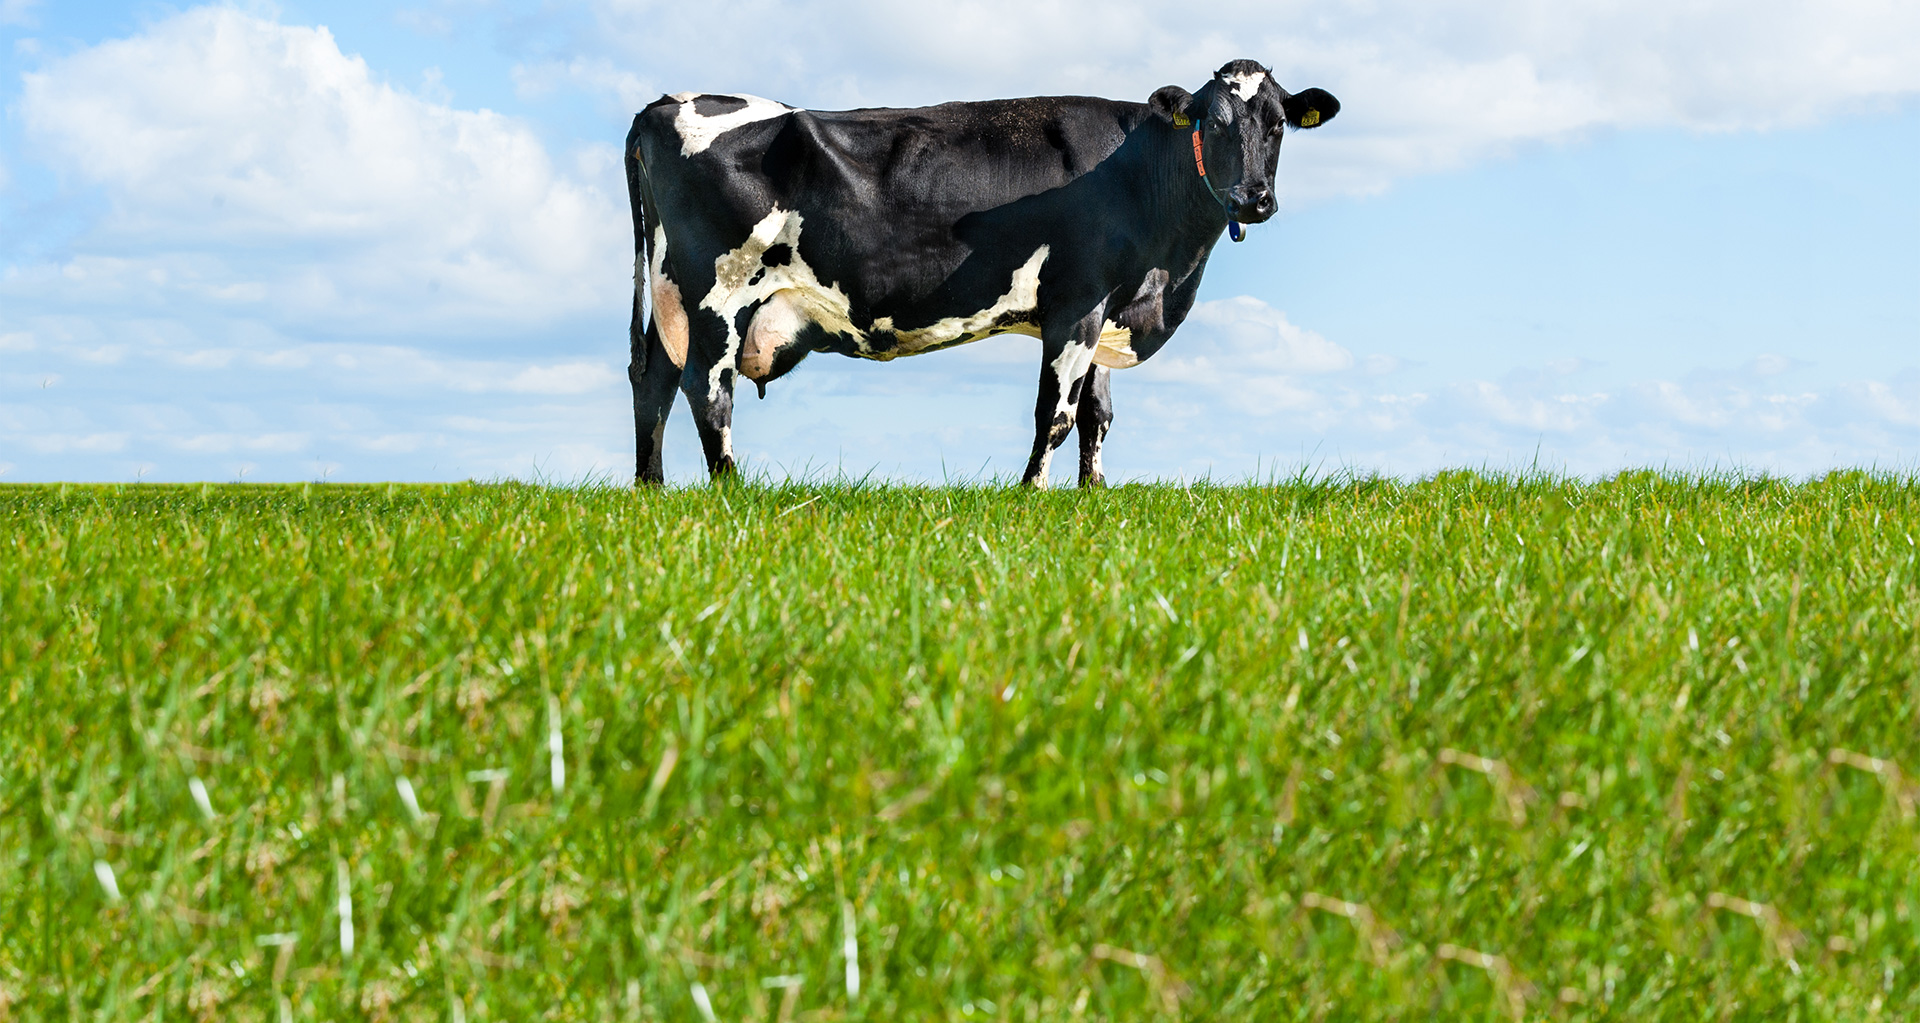

In [8]:
img

In [9]:
img_tensor=pipeline(img)

In [10]:
img_tensor.shape

torch.Size([3, 1023, 1920])

In [11]:
img_tensor=img_tensor.unsqueeze(0)

In [12]:
img_tensor.shape

torch.Size([1, 3, 1023, 1920])

In [13]:
pres=frcnn(img_tensor)

In [14]:
pres ### (x1,y1,x2,y2)

[{'boxes': tensor([[ 637.7737,   74.5487, 1329.2562,  510.0791],
          [ 238.5821,  464.3848,  252.9838,  480.7674],
          [ 137.8988,  463.0373,  154.7592,  480.0115],
          [ 238.3982,  464.5887,  254.0624,  480.3631],
          [ 324.3779,  464.1412,  341.4115,  478.7349]], grad_fn=<StackBackward>),
  'labels': tensor([21, 16, 16,  9, 16]),
  'scores': tensor([0.9998, 0.3146, 0.0750, 0.0706, 0.0566], grad_fn=<IndexBackward>)}]

In [17]:
coco_cats=[

    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',

    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',

    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',

    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',

    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',

    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',

    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',

    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',

    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',

    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',

    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',

    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [23]:
coco_cats[21]

'cow'

In [19]:
len(coco_cats)

91

https://arxiv.org/pdf/1405.0312.pdf

In [20]:
###### Draw bounding box around the image ##########
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import matplotlib.patches as patches

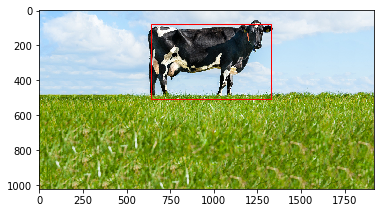

In [24]:
fig,ax = plt.subplots(1)
ax.imshow(img_tensor.squeeze(0).permute(1,2,0).numpy())
rect = patches.Rectangle((637.7737,   74.5487),1329.2562-637.7737, 510.0791-74.5487,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

In [25]:
cars=PIL.Image.open("./data/cars.jpg")

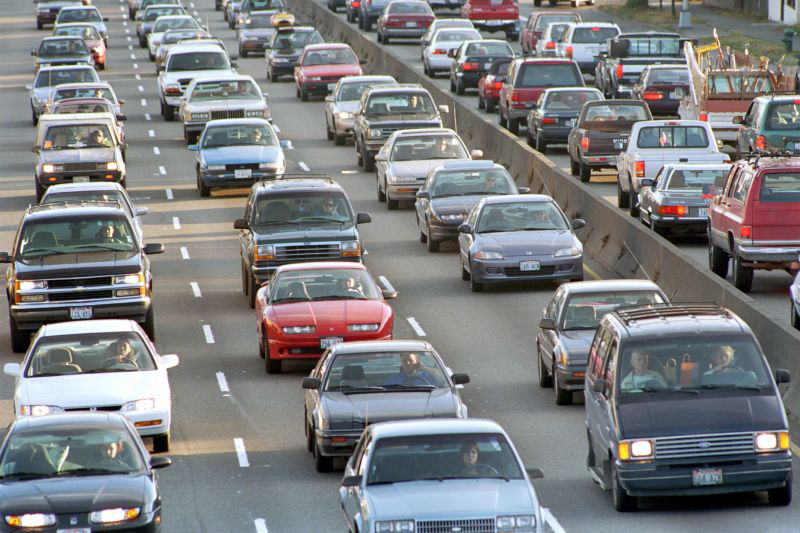

In [26]:
cars

In [27]:
cars_tensor=pipeline(cars)

In [28]:
cars_tensor=cars_tensor.unsqueeze(0)

In [29]:
preds=frcnn(cars_tensor)

In [30]:
preds[0]['scores'][preds[0]['scores']>0.50]

tensor([0.9983, 0.9955, 0.9920, 0.9901, 0.9894, 0.9879, 0.9875, 0.9867, 0.9840,
        0.9834, 0.9824, 0.9823, 0.9795, 0.9787, 0.9749, 0.9746, 0.9721, 0.9688,
        0.9666, 0.9658, 0.9653, 0.9653, 0.9594, 0.9541, 0.9528, 0.9514, 0.9466,
        0.9447, 0.9406, 0.9389, 0.9277, 0.9232, 0.9033, 0.8999, 0.8835, 0.8728,
        0.8650, 0.8570, 0.8154, 0.8050, 0.8031, 0.7686, 0.7593, 0.7532, 0.7516,
        0.7199, 0.7063, 0.6300, 0.6149, 0.5992, 0.5938, 0.5806, 0.5385, 0.5224,
        0.5185, 0.5120], grad_fn=<IndexBackward>)

In [31]:
preds[0]['boxes'].shape

torch.Size([100, 4])

In [32]:
preds[0]['scores'].shape

torch.Size([100])

In [33]:
preds[0]['labels'].shape

torch.Size([100])

In [34]:
preds[0]['labels'][preds[0]['scores']>0.50]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
        1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
        3, 1, 1, 8, 1, 8, 3, 3])

In [35]:
preds[0]['boxes'][preds[0]['scores']>0.50,:] ### Bounding Boxes 

tensor([[4.5477e+02, 1.9625e+02, 5.8625e+02, 2.9088e+02],
        [5.6635e-01, 4.0998e+02, 1.6808e+02, 5.3300e+02],
        [1.9166e+02, 1.1915e+02, 2.8467e+02, 1.9692e+02],
        [3.7288e+02, 1.2923e+02, 4.7880e+02, 2.1247e+02],
        [1.0081e+01, 3.1915e+02, 1.7726e+02, 4.5067e+02],
        [5.6511e+02, 9.8296e+01, 6.5406e+02, 1.8636e+02],
        [3.3325e+02, 4.2046e+02, 5.5324e+02, 5.3168e+02],
        [5.2391e+02, 8.6877e+01, 6.0555e+02, 1.5139e+02],
        [3.2196e+02, 7.4426e+01, 3.9669e+02, 1.4625e+02],
        [6.2098e+02, 3.5043e+02, 6.6514e+02, 3.9171e+02],
        [4.1376e+02, 1.6360e+02, 5.2235e+02, 2.5657e+02],
        [3.8394e+02, 3.5253e+02, 4.3665e+02, 3.8788e+02],
        [2.6363e+02, 2.6755e+01, 3.2269e+02, 8.1945e+01],
        [6.3729e+02, 1.6078e+02, 7.2702e+02, 2.4118e+02],
        [2.9390e+02, 4.3725e+01, 3.6113e+02, 1.0048e+02],
        [4.4778e+02, 3.9975e+01, 5.1587e+02, 9.6778e+01],
        [5.3435e+02, 2.7711e+02, 6.7495e+02, 4.0011e+02],
        [7.017

In [36]:
## Plot  boxes on an image
def plot_objects(img,boxes):
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    rects=[patches.Rectangle((i[0],i[1]),i[2]-i[0],i[3]-i[1],linewidth=1,edgecolor='r',facecolor='none') for i in boxes]
    for r in rects:
        ax.add_patch(r)

In [37]:
image=cars_tensor.squeeze(0).permute(1,2,0).numpy()

In [38]:
boxes=preds[0]['boxes'][preds[0]['scores']>0.50,:]

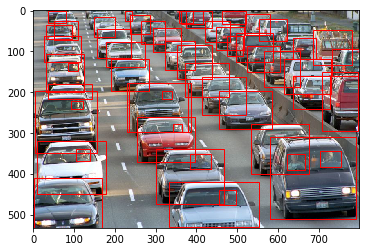

In [39]:
plot_objects(image,boxes)

In [40]:
## For a given score threshold find out: bounding boxes, number of each class detected
def get_statistics(predictions,threshold,coco_cats):
    idx=predictions[0]['scores']>threshold
    boxes=predictions[0]['boxes'][idx,:]
    labels=predictions[0]['labels'][idx]
    counts={coco_cats[i]:(labels==i).sum().item() for i in labels.unique()}
    return counts,boxes

In [41]:
counts,boxes=get_statistics(preds,0.1,coco_cats)

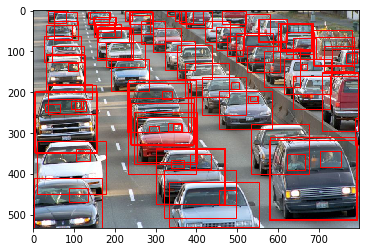

In [42]:
plot_objects(image,boxes)

In [43]:
counts

{'person': 21, 'car': 65, 'bus': 1, 'truck': 13}